# Investigate a Data set (Titanic Dataset Analysis)

> by Joy Lal Chattaraj

## 1. Introduction

>This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).

> The purpose of this project is to perform analysis (cleaning, organizing, analysing questions or trends in the data) on the sample dataset

> After analysing the dataset, I decided to investigate further on the following questions :
1. Were social-economic standing a factor in survival rate?
2. Which gender had a better chance of survival?
3. Which age group survived the most?




## 2. Importing necessary Libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pprint import pprint
from scipy import stats
from __future__ import division

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 3. Initial Data Analysis

### 3.1 Reading the Data into Dataframe

In [107]:
titanic_data = pd.read_csv('titanic_data.csv')

### 3.2 Data Description

(from https://www.kaggle.com/c/titanic)

* survival Survival (0 = No; 1 = Yes)
* pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name Name
* sex Sex
* age Age
* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard
* ticket Ticket Number
* fare Passenger Fare
* cabin Cabin
* embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

##### SPECIAL NOTES:

>Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

>Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

>With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

* Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent: Mother or Father of Passenger Aboard Titanic
* Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

### 3. Basic Structure of the Data

In [108]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 3.4 Summary of the Data set

In [110]:
titanic_data.describe(exclude=[type(None)])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Data Cleaning / Organizing / Wrangling

### 4.1 Checking for Missing values

In [111]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [112]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> The Age field has a lot of missing values, and the Embarked field also has a couple of nan values. We may replace them with the mean of the group so that they donot effect our calculations or remove them. We will decide on this at a later stage.

#### 4.1.1 Missing Ages

In [113]:
missing_age_male = titanic_data['Survived'][ (titanic_data.Sex =='male') & titanic_data.Age.isnull() ]

missing_age_female = titanic_data['Survived'][ (titanic_data.Sex =='female') & titanic_data.Age.isnull() ]

print 'Number of missing age of male : ',missing_age_male.count(), 
print '\tSurvived : ', missing_age_male.sum()

print 'Number of missing age of female : ',missing_age_female.count(), 
print '\tSurvived : ', missing_age_female.sum()

Number of missing age of male :  124 	Survived :  16
Number of missing age of female :  53 	Survived :  36


>Missing Age data will affect our third question of analysis (Which age group survived the most). But graphing and summations shouldn't be a problem since they will be not be considered during our calculations. We also can't replace them with the mean of the dataset as it would drastically increase the number of survivals in a particular age group. 

>However, 177 is roughly 20% of our 891 sample dataset which seems like a lot to remove from the dataset. 
We should keep note of the proportions across male and female...
* Age missing in male data: 124
* Age missing in female data: 53

#### 4.1.2 Mising Embarkment port

In [114]:
titanic_data[titanic_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> Two entries donot have the Embarked field specified. Since this is a very small portion of the dataset we can ignore this while performing our calculations.

### 4.2 Checking for unexpected data values

In [115]:
data_check = False

check_survival =0
check_sex = 0
check_pclass = 0
check_embarked = 0

for index, row in titanic_data.iterrows():
    if row['Survived'] not in [0, 1]:
        check_survival += 1
    if row['Sex'] not in ['male', 'female']:
        check_sex += 1
    if row['Pclass'] not in [1, 2, 3]:
        check_plcass += 1
    if row['Embarked'] not in ['C','Q','S']:
        check_embarked += 1
        print "Inconsistency in Embarked column : ", row['Embarked']
    
        
print "\nInconsistent data count :\n"
print "Survived Column : ", check_survival
print "Sex Column : ",      check_sex
print "Pclass Column : ",   check_pclass
print "Embarked Column : ", check_embarked
    
    

Inconsistency in Embarked column :  nan
Inconsistency in Embarked column :  nan

Inconsistent data count :

Survived Column :  0
Sex Column :  0
Pclass Column :  0
Embarked Column :  2


> We knew that the Embarked column has 2 nan values, all others are as expected.

### 4.3 Removing unwanted fields

In [116]:
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


> These fields donot have any importance with respect to the questions we are investigating on.

### 4.4 Create new field - Age Bin 

> The field age bin would help us to investigate the group that survived the most without much effort.

In [117]:
def map_age_bin(age):
    if age < 18:
        return '0-18'
    if age < 35:
        return '18-35'
    elif age < 55:
        return '35-60'
    elif not math.isnan(age):
        return '> 60'
    
titanic_data['Age Bin'] = titanic_data['Age'].apply(map_age_bin)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Bin
0,1,0,3,male,22.0,1,0,7.2500,S,18-35
1,2,1,1,female,38.0,1,0,71.2833,C,35-60
2,3,1,3,female,26.0,0,0,7.9250,S,18-35
3,4,1,1,female,35.0,1,0,53.1000,S,35-60
4,5,0,3,male,35.0,0,0,8.0500,S,35-60


### 4.5 Mapping Data Items to Values

> In order to intrepret the data easier the following fields need to be modified:
1. Survived - changed to boolean (1 = True, 0 = False)
2. Pclass - changed to Socio-Economic status (1st - Upper Class, 2nd - Middle Class, 3rd - Lower Class)
3. Embarked - changed to name of embarkation port (C = Cherbourg; Q = Queenstown; S = Southampton)


In [118]:
def map_values(df):
    
    # survived 
    survived_values = {0: False, 1: True}
    df['Survived'] = df['Survived'].map(survived_values)

    # PClass 
    pclass_values = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    df['Pclass'] = df['Pclass'].map(pclass_values)

    # Embarkation port 
    port_values = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Queenstown'}
    df['Embarked'] = df['Embarked'].map(port_values)
    
    return df

titanic_data = map_values(titanic_data)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Bin
0,1,False,Lower Class,male,22.0,1,0,7.2500,Southampton,18-35
1,2,True,Upper Class,female,38.0,1,0,71.2833,Cherbourg,35-60
2,3,True,Lower Class,female,26.0,0,0,7.9250,Southampton,18-35
3,4,True,Upper Class,female,35.0,1,0,53.1000,Southampton,35-60
4,5,False,Lower Class,male,35.0,0,0,8.0500,Southampton,35-60


### 4.6 A few functions to help in further calculations

In [119]:
def calculate_percentages_and_counts(field):
    
    survived_by_field = titanic_data[ titanic_data.Survived == True].groupby([field]).size()
    non_survived_by_field = titanic_data[ titanic_data.Survived == False].groupby([field]).size()
    totals = survived_by_field + non_survived_by_field

    survival_counts = survived_by_field.values
    non_survival_counts = non_survived_by_field.values
    survival_percentage = survival_counts*100/totals
    non_survival_percentage = non_survival_counts*100/totals
    
    return [survival_counts, non_survival_counts, survival_percentage, non_survival_percentage]

def x_indices(size):
    
    indices = []
    for i in range(0, size):
        indices.append( i + 0.4 )
    
    return indices
        
    

def plot_bar_chart(survival, non_survival, x_ticks, plt1):
    
    p1 = plt1.bar( range(len(x_ticks)), survival, color = 'g', alpha = 0.6)
    p2 = plt1.bar( range(len(x_ticks)), non_survival, bottom = survival, color = 'r', alpha = 0.6)
    plt1.set_xticks( x_indices( len(x_ticks) ) )
    plt1.set_xticklabels(x_ticks)
    plt1.legend((p1[0], p2[0]), ('Survived', 'Did not Survive'), loc='upper left')
    
    return plt1
    
    

## 5. Analysing the Data set

### Q1. Were social-economic standing a factor in survival rate?

##### Over view of the data divided by Passenger's Class

* Pclass is used as a proxy to determine passenger's social-economic status

In [120]:
survived_data = titanic_data[ ['Survived', 'Pclass', 'PassengerId'] ].rename(columns = { 'PassengerId' : 'Passengers'})
survived_data.groupby(['Pclass', 'Survived']).count()

Passengers
Pclass       Survived            
Lower Class  False            372
             True             119
Middle Class False             97
             True              87
Upper Class  False             80
             True             136

##### Proportion of persons who survived in each class

In [121]:
survived_data.groupby(['Pclass'])['Survived'].mean()

Pclass
Lower Class     0.242363
Middle Class    0.472826
Upper Class     0.629630
Name: Survived, dtype: float64

##### Visualuzations

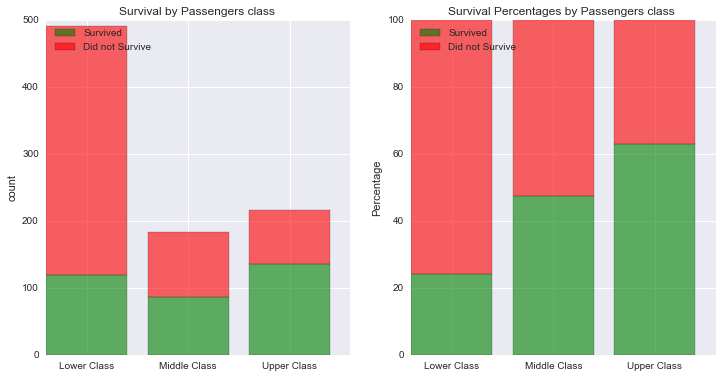

In [122]:
survival_counts, non_survival_counts, survival_percentage, non_survival_percentage = calculate_percentages_and_counts('Pclass')

classes = ['Lower Class', 'Middle Class', 'Upper Class']

fig, (plt1, plt2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

plt1 = plot_bar_chart(survival_counts, non_survival_counts, classes, plt1)
plt1.set_title('Survival by Passengers class ')
plt1.set_ylabel('count')

plt2 = plot_bar_chart(survival_percentage, non_survival_percentage, classes, plt2)
plt2.set_title('Survival Percentages by Passengers class ')
plt2.set_ylabel('Percentage')

plt.show()

> The Visuals clearly point out that as we move towards the upper classes, chances of survival increases. To check if our intution is correct, we can perform a chi-squared test to see if the results are statistically significatnt.

> More on chi-test : https://en.wikipedia.org/wiki/Chi-squared_test

> Chi-squared Table : <img src="http://ib.bioninja.com.au/_Media/chi-table_med.jpeg" width="500px" height="500px" />

##### Hypothesis

* Null Hypothesis      Ho = Social-Economic status has no impact on survival chances of a person

* Alternate Hypothesis Ha = Social-Economic status does impact the chances of survival chances of a person

In [123]:
chi_result = stats.chi2_contingency([ survival_counts, non_survival_counts])

print "Chi-squared value :\t", chi_result[0]
print "P Value :\t", chi_result[1]

Chi-squared value :	102.888988757
P Value :	4.5492517113e-23


#### Conclusion
> Since P value < 0.05 and looking at the chi-table we can figure out that the chi-value lies in the significant region. So We reject the null hypothesis.<br/>

> Thus social-economic status of a person effects the survival chances of a person. A person in upper class is more likely to survive than the ones in the lower ones.

### Q2. Which gender had a better chance of survival?

##### Number of Survivors by sex

In [124]:
survived_data = titanic_data[ ['Sex', 'Survived', 'PassengerId'] ].rename(columns = { 'PassengerId' : 'Passengers'})
survived_data.groupby(['Sex', 'Survived']).count()

Passengers
Sex    Survived            
female False             81
       True             233
male   False            468
       True             109

##### Proportion of Men and Women survived

In [125]:
survived_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

##### Visualizations

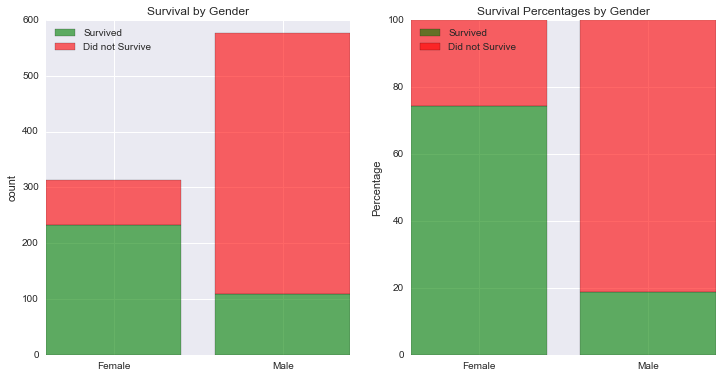

In [126]:
survival_counts, non_survival_counts, survival_percentage, non_survival_percentage = calculate_percentages_and_counts('Sex')

genders = ['Female', 'Male']

fig, (plt1, plt2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

plt1 = plot_bar_chart(survival_counts, non_survival_counts, genders, plt1)
plt1.set_title('Survival by Gender')
plt1.set_ylabel('count')

plt2 = plot_bar_chart(survival_percentage, non_survival_percentage, genders, plt2)
plt2.set_title('Survival Percentages by Gender')
plt2.set_ylabel('Percentage')

plt.show()

> Thus, we observe a difference of more than 50% for survival rate between the two genders.To check if the result is significant we can carry out chi-squared test to calculate the p-value for the data as it is a categorical data.

##### Hypothesis

* Null Hypothesis      Ho = Gender has no impact on survival chances of a person

* Alternate Hypothesis Ha = Gender does impact the chances of survival chances of a person

In [127]:
chi_result = stats.chi2_contingency([ survival_counts, non_survival_counts])

print "Chi-squared value :\t", chi_result[0]
print "P Value :\t", chi_result[1]

Chi-squared value :	260.717020167
P Value :	1.19735706278e-58


#### Conclusion
> Since P value < 0.05 and looking at the chi-table we can figure out that the chi-value lies in the significant region. So We reject the null hypothesis.<br/>
Thus, we can conclude that Women had a better chance of survival, maybe due to the fact that during evacuations women and children are given preference over men.

### Q3. Which age group survived the most?

##### Number of Survivors in each age group

In [128]:
survived_data = titanic_data[ ['Survived', 'Age Bin', 'PassengerId'] ].rename(columns = { 'PassengerId' : 'Passengers'})
survived_data.groupby(['Age Bin', 'Survived']).count()

Passengers
Age Bin Survived            
0-18    False             52
        True              61
18-35   False            231
        True             135
35-60   False            112
        True              81
> 60    False             29
        True              13

##### Proportion of people who survived

In [129]:
survived_data.groupby(['Age Bin'])['Survived'].mean()

Age Bin
0-18     0.539823
18-35    0.368852
35-60    0.419689
> 60     0.309524
Name: Survived, dtype: float64

##### Visualizations

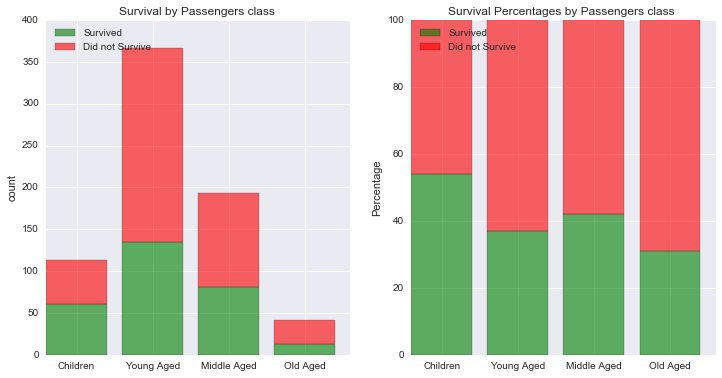

In [130]:
survival_counts, non_survival_counts, survival_percentage, non_survival_percentage = calculate_percentages_and_counts('Age Bin')

age_bins = ['Children', 'Young Aged', 'Middle Aged', 'Old Aged']

fig, (plt1, plt2) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

plt1 = plot_bar_chart(survival_counts, non_survival_counts, age_bins, plt1)
plt1.set_title('Survival by Passengers class ')
plt1.set_ylabel('count')

plt2 = plot_bar_chart(survival_percentage, non_survival_percentage, age_bins, plt2)
plt2.set_title('Survival Percentages by Passengers class ')
plt2.set_ylabel('Percentage')

plt.show()

>Children (age group 0-18) seem to have a higher survival rate than the other groups. To check if the difference is statistically significant, we can carry out a ch-squared test.

##### Hypothesis test

* Null Hypothesis : Ho -> Age of a person doesn't effect the chances of his survial
* Alternative Hypothesis : Ha -> Age of a person does effect the chances of his survial

##### Chi - Test

In [131]:
chi_result = stats.chi2_contingency([ survival_counts, non_survival_counts])

print "Chi-squared value :\t", chi_result[0]
print "P Value :\t", chi_result[1]

Chi-squared value :	12.25483429
P Value :	0.00655928759607


##### Conclusion

>Since P value is far less than 0.05 and looking at the chi-table we can figure out that the chi-value lies in the significant region. So We reject the null hypothesis.
Thus, age of a person does effect the survival rate of a person. We can see from the graph that children had better chances of survival than any other group.

### Final Conclusion

>The results of the analysis, although tentative, would appear to indicate that class and sex, namely, being a female with upper social-economic standing (first class), would give one the best chance of survival when the tragedy occurred on the Titanic. Age did not seem to be a major factor although children had better chances of survival. While being a man in third class, gave one the lowest chance of survival.

>#### Issues :
* A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers.
* The category of 'children' was assumed to be anyone under the age of 18, using today's North American standard for adulthood which was certainly not the case in the 1900s.
